In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [39]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [40]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [41]:
# there seems too much null values. which also states imbalance of data.
# we can use SMOTES

In [42]:
df.fillna(method='bfill', inplace=True)

In [43]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,8.6,9.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,8.6,9.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,2.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,8.6,9.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,8.6,9.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,8.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,8.6,9.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [44]:
df.drop('Date', axis=1, inplace=True)

In [45]:
# converting categorical column into numric by  label encoders
from sklearn.preprocessing import LabelEncoder



In [46]:


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode 'Location' column
df['Location_encoded'] = label_encoder.fit_transform(df['Location'])

# Encode 'WindGustDir' column
df['WindGustDir_encoded'] = label_encoder.fit_transform(df['WindGustDir'])

# Encode 'WindDir9am' column
df['WindDir9am_encoded'] = label_encoder.fit_transform(df['WindDir9am'])

# Encode 'WindDir3pm' column
df['WindDir3pm_encoded'] = label_encoder.fit_transform(df['WindDir3pm'])

# Encode 'RainToday' column
df['RainToday_encoded'] = label_encoder.fit_transform(df['RainToday'])

# Encode 'RainTomorrow' column
df['RainTomorrow_encoded'] = label_encoder.fit_transform(df['RainTomorrow'])





In [47]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_encoded,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded,RainToday_encoded,RainTomorrow_encoded
0,Albury,13.4,22.9,0.6,8.6,9.0,W,44.0,W,WNW,...,16.9,21.8,No,No,1,13,13,14,0,0
1,Albury,7.4,25.1,0.0,8.6,9.0,WNW,44.0,NNW,WSW,...,17.2,24.3,No,No,1,14,6,15,0,0
2,Albury,12.9,25.7,0.0,8.6,9.0,WSW,46.0,W,WSW,...,21.0,23.2,No,No,1,15,13,15,0,0
3,Albury,9.2,28.0,0.0,8.6,9.0,NE,24.0,SE,E,...,18.1,26.5,No,No,1,4,9,0,0,0
4,Albury,17.5,32.3,1.0,8.6,9.0,W,41.0,ENE,NW,...,17.8,29.7,No,No,1,13,1,7,0,0


In [48]:
# Dropping  original categorical column , as we will be using encoded one.
columns_to_drop = ['WindGustDir', 'Location', 'WindDir9am',"WindDir3pm", 'RainToday', 'RainTomorrow']

In [49]:
df = df.drop(columns_to_drop, axis=1)

In [50]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_encoded,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded,RainToday_encoded,RainTomorrow_encoded
0,13.4,22.9,0.6,8.6,9.0,44.0,20.0,24.0,71.0,22.0,...,8.0,2.0,16.9,21.8,1,13,13,14,0,0
1,7.4,25.1,0.0,8.6,9.0,44.0,4.0,22.0,44.0,25.0,...,7.0,2.0,17.2,24.3,1,14,6,15,0,0
2,12.9,25.7,0.0,8.6,9.0,46.0,19.0,26.0,38.0,30.0,...,7.0,2.0,21.0,23.2,1,15,13,15,0,0
3,9.2,28.0,0.0,8.6,9.0,24.0,11.0,9.0,45.0,16.0,...,7.0,8.0,18.1,26.5,1,4,9,0,0,0
4,17.5,32.3,1.0,8.6,9.0,41.0,7.0,20.0,82.0,33.0,...,7.0,8.0,17.8,29.7,1,13,1,7,0,0


In [51]:
# finding outliers & setting threshold value
lower_threshold = 0.25
upper_threshold = 0.75

In [52]:
df = df[(df['Rainfall'] >= 0.25) & (df['Rainfall'] <= 0.75)][(df['Evaporation'] >= 0.25) & (df['Evaporation'] <= 0.75)]

C:\Users\User\AppData\Local\Temp/ipykernel_13700/2857220977.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(df['Rainfall'] >= 0.25) & (df['Rainfall'] <= 0.75)][(df['Evaporation'] >= 0.25) & (df['Evaporation'] <= 0.75)]


In [53]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_encoded,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded,RainToday_encoded,RainTomorrow_encoded
count,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000
mean,11.350000,18.100000,0.566667,0.6,1.100000,44.833333,17.166667,20.833333,81.500000,69.666667,...,7.0,6.833333,15.000000,16.650000,4.166667,9.500000,9.333333,8.333333,0.0,0.166667
std,2.562616,2.239643,0.081650,0.0,0.961249,14.483324,9.745084,13.257702,15.228263,16.305418,...,0.0,0.752773,2.419917,2.459065,1.329160,2.345208,3.265986,2.581989,0.0,0.408248
min,9.100000,16.400000,0.400000,0.6,0.000000,22.000000,0.000000,4.000000,52.000000,50.000000,...,7.0,6.000000,12.600000,13.900000,2.000000,5.000000,4.000000,5.000000,0.0,0.000000
25%,9.500000,16.600000,0.600000,0.6,0.225000,36.750000,14.500000,10.750000,85.000000,62.000000,...,7.0,6.250000,13.250000,14.700000,3.500000,10.000000,8.000000,8.000000,0.0,0.000000
50%,10.800000,17.650000,0.600000,0.6,1.300000,54.000000,19.000000,22.000000,85.000000,67.500000,...,7.0,7.000000,15.200000,17.200000,5.000000,10.000000,10.000000,8.000000,0.0,0.000000
75%,12.100000,18.100000,0.600000,0.6,1.700000,54.000000,24.250000,31.750000,85.000000,73.000000,...,7.0,7.000000,15.200000,17.300000,5.000000,10.000000,12.000000,8.000000,0.0,0.000000
max,15.800000,22.400000,0.600000,0.6,2.300000,54.000000,26.000000,35.000000,97.000000,98.000000,...,7.0,8.000000,19.200000,20.400000,5.000000,12.000000,12.000000,13.000000,0.0,1.000000


In [54]:
df.shape

(6, 22)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


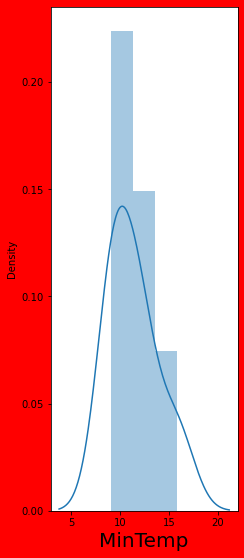

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


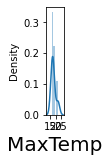

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


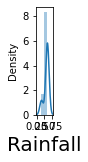

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


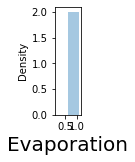

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


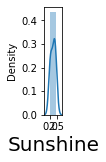

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


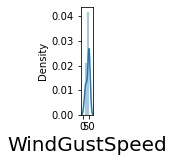

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


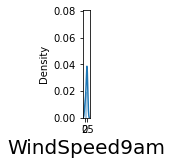

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


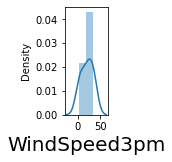

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


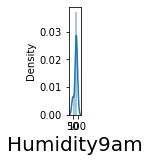

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


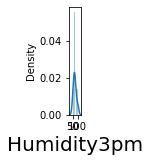

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


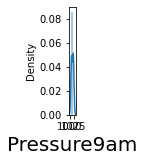

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


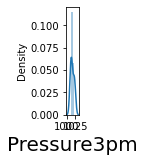

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


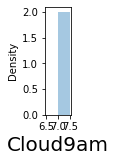

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


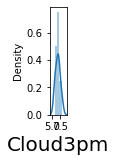

ValueError: num must be 1 <= num <= 14, not 15

<Figure size 432x288 with 0 Axes>

In [103]:
plt.figure(figsize=(20,15),facecolor="red")
plotnumber=1
for column in df:
    if plotnumber<=912:
        ax=plt.subplot(2,7,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
    plt.tight_layout()
    plt.show()

In [100]:
corr = df.corr()

In [101]:
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_encoded,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded,RainToday_encoded,RainTomorrow_encoded
MinTemp,1.000000,0.956555,0.430135,NaN,1.558877e-01,-0.488479,-0.484926,-0.556007,0.654210,0.701217,...,NaN,8.449680e-01,0.884328,0.851366,-0.519652,-0.890203,-0.994089,-0.743579,NaN,0.850711
MaxTemp,0.956555,1.000000,0.196865,NaN,3.065697e-01,-0.720771,-0.699182,-0.728130,0.476751,0.702113,...,NaN,9.134360e-01,0.960930,0.910407,-0.745756,-0.887209,-0.940579,-0.601792,NaN,0.940579
Rainfall,0.430135,0.196865,1.000000,NaN,1.019294e-01,0.467912,0.209464,0.511169,0.949024,0.590887,...,NaN,-1.084652e-01,-0.040489,-0.089650,0.430007,-0.522233,-0.400000,-0.885438,NaN,0.200000
Evaporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunshine,0.155888,0.306570,0.101929,NaN,1.000000e+00,-0.485560,-0.789969,-0.047081,0.286921,0.750308,...,NaN,1.841161e-16,0.144445,-0.027075,-0.500918,-0.567796,-0.050965,-0.370679,NaN,0.611577
WindGustSpeed,-0.488479,-0.720771,0.467912,NaN,-4.855595e-01,1.000000,0.914214,0.892462,0.165491,-0.384773,...,NaN,-7.551681e-01,-0.793188,-0.731986,0.999100,0.509327,0.462275,-0.003565,NaN,-0.772337
WindSpeed9am,-0.484926,-0.699182,0.209464,NaN,-7.899692e-01,0.914214,1.000000,0.648878,-0.092318,-0.664159,...,NaN,-5.679882e-01,-0.663209,-0.541233,0.923869,0.678211,0.418927,0.243757,NaN,-0.862990
WindSpeed3pm,-0.556007,-0.728130,0.511169,NaN,-4.708114e-02,0.892462,0.648878,1.000000,0.252115,-0.118732,...,NaN,-9.051404e-01,-0.878983,-0.894129,0.887168,0.363437,0.578914,-0.109062,NaN,-0.622024
Humidity9am,0.654210,0.476751,0.949024,NaN,2.869214e-01,0.165491,-0.092318,0.252115,1.000000,0.796607,...,NaN,1.482978e-01,0.237713,0.161026,0.123513,-0.764418,-0.611236,-0.986795,NaN,0.498640
Humidity3pm,0.701217,0.702113,0.590887,NaN,7.503077e-01,-0.384773,-0.664159,-0.118732,0.796607,1.000000,...,NaN,3.530420e-01,0.486596,0.344672,-0.421425,-0.946663,-0.620932,-0.870934,NaN,0.851278


<AxesSubplot:>

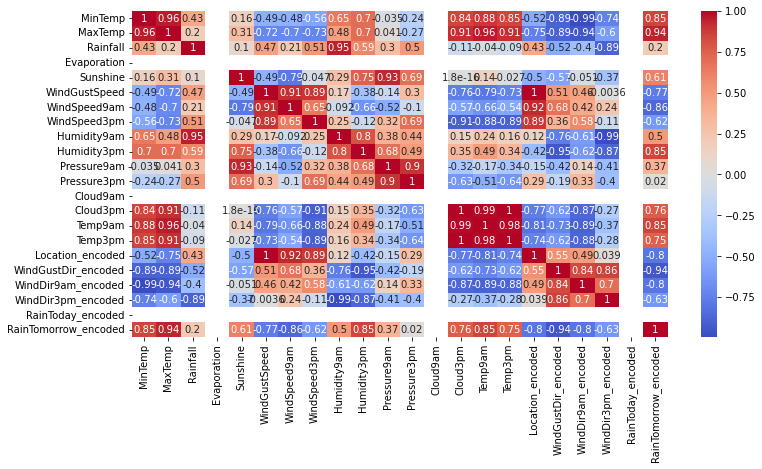

In [102]:
# checking correlation of features.
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


In [56]:
#seprating data in x& y
x=df.drop(columns=['RainTomorrow_encoded'])
y=df['RainTomorrow_encoded']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)


In [58]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [59]:
# Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
# Predicting 
y_pred = dtc.predict(x_test)

In [60]:
y_pred

array([0, 0])

In [61]:
# Evaluating the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [62]:
# checking accuracy 
accuracy_score(y_test,y_pred)

1.0

In [ ]:
# Saving dtc module o predict  whether  it wil rain tomorrow or not


In [63]:
#  Saving the model.
import joblib
joblib.dump(dtc,'DecisionTreeClassifier_model.pkl')

['DecisionTreeClassifier_model.pkl']

In [64]:
# Load the saved model from the file
dtc = joblib.load('DecisionTreeClassifier_model.pkl')

In [ ]:
# Now we will build a module to predict how much it will rain


In [65]:
#seprating data in x& y
x=df.drop(columns=['Rainfall'])
y=df['Rainfall']

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [90]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [91]:
# Make predictions on the test set
y_pred = regressor.predict(x_test)

In [92]:
y_pred

array([0.6, 0.6])

In [93]:
# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.232595164407831e-32


In [94]:
# Perform cross-validation
from sklearn.model_selection import  cross_val_score, GridSearchCV

scores = cross_val_score(regressor, x_train, y_train, cv=4, scoring='neg_mean_squared_error')
mse_scores = -scores


In [95]:
# Print the cross-validation scores
print('Cross-Validation MSE Scores:', mse_scores)
print('Mean MSE:', mse_scores.mean())


Cross-Validation MSE Scores: [0.00355893 0.00140881 0.04       0.0005718 ]
Mean MSE: 0.011384885088953132


In [98]:
# Saving model to predict how much it will rain
joblib.dump(lr,'LinearRegression_model.pkl')

['LinearRegression_model.pkl']

In [99]:
# Loading model to predict how much it will rain

lr = joblib.load('LinearRegression_model.pkl')